# DAY4

In [1]:
import os
import urllib
import numpy as np
import pandas as pd

In [2]:
if os.path.exists('./data.csv'):
    print('file exists')
else: 
    urllib.request.urlretrieve ('https://data.cityofnewyork.us/api/views/bug8-9f3g/rows.csv?accessType=DOWNLOAD', "./data.csv")
    print('file downloaded')
    
data = pd.read_csv('data.csv')

file exists


#### 1. How many different companies are represented in the data set?

In [3]:
company_number = len(data['Company Name'].unique())

print('There are %d different companies in the data set.' % (company_number))

There are 439 different companies in the data set.


#### 2. What is the total number of jobs created for businesses in Queens?

In [4]:
jobs_created_in_queens = data[['City','State','Job created']].groupby('City')['Job created'].agg('sum')['Queens']

print('A total of %d jobs were created in queens.'% (jobs_created_in_queens))

A total of 90 jobs were created in queens.


#### 3. How many different unique email domains names are there in the data set?

In [5]:
email_domain_number =len(data['company email'].str.split('@', expand=True)[1].unique())

print('There are %d unique email domains in the data set.' % (email_domain_number))

There are 358 unique email domains in the data set.


#### 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [6]:
NTA_details = data.groupby('NTA').agg(company_count=('Company Name','count'), avg_total_saving=('Total Savings','mean'), job_created=('Job created','sum'))

NTA_5min_details = NTA_details[NTA_details['company_count'] >=5].reset_index()

NTA_5min_details



,NTA,company_count,avg_total_saving,job_created
0,Battery Park City-Lower Manhattan,9,469890.796667,0.0
1,Bushwick South,10,26140.455000,10.0
2,Carroll Gardens-Columbia Street-Red Hook,11,24337.390000,0.0
3,College Point,7,17159.372857,2.0
4,Crown Heights North,9,4036.298889,0.0
5,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,10,59950.340000,0.0
6,East New York,9,48433.093333,15.0
7,East Williamsburg,11,13990.626364,0.0
8,Greenpoint,14,9753.649286,0.0
9,Hunters Point-Sunnyside-West Maspeth,75,23931.398933,0.0


#### 5. Save your result for the previous question as a CSV file.

In [7]:
NTA_5min_details.to_csv('NTA_5min_details.csv')

# DAY5

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#### Scatter plot: Avg. total svaings vs. Jobs created

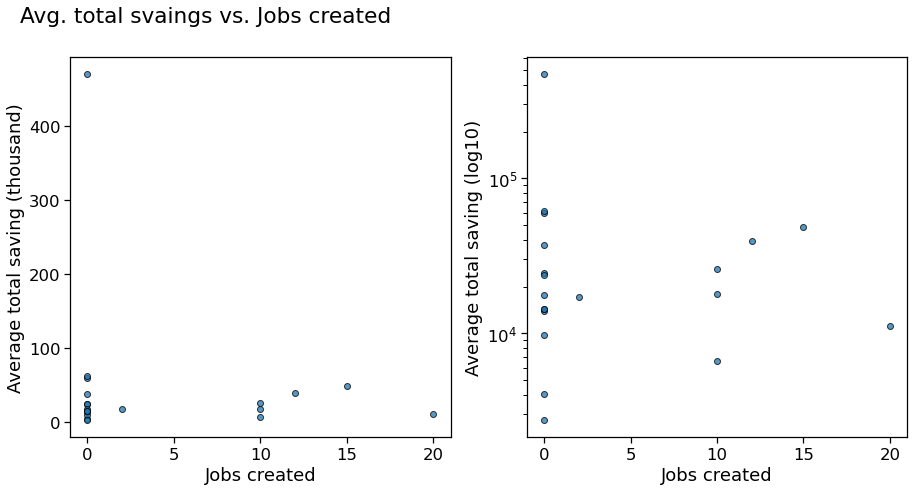

In [9]:
sns.set_context('notebook',font_scale=1.5)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))

ax1.scatter(NTA_5min_details['job_created'],NTA_5min_details['avg_total_saving']/1000, alpha=0.75, ec='black')
ax1.set_xlabel('Jobs created' )
ax1.set_ylabel('Average total saving (thousand)')

ax2.scatter(NTA_5min_details['job_created'],NTA_5min_details['avg_total_saving'], alpha=0.75, ec='black')
ax2.set_yscale('log',base=10)
ax2.set_xlabel('Jobs created' )
ax2.set_ylabel('Average total saving (log10)')

plt.suptitle('Avg. total svaings vs. Jobs created',x =0.25)
plt.show()

#### Histogram of the log of the average total savings

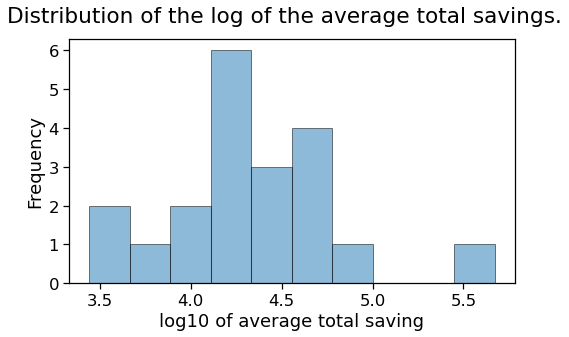

In [17]:
sns.set_context('notebook',font_scale=1.5)

fig, ax = plt.subplots(1,1, figsize=(8,4.5))

ax.hist(np.log10(NTA_5min_details['avg_total_saving']), alpha=0.5, histtype='bar', ec='black')

ax.set_xlabel('log10 of average total saving' )
ax.set_ylabel('Frequency')

plt.suptitle('Distribution of the log of the average total savings.',x =0.5)

plt.show()

#### Lineplot: Number of jobs created per month

In [11]:
data['Effective Date'] = pd.to_datetime(data['Effective Date'], dayfirst=False)
time_line = pd.PeriodIndex(data['Effective Date'], freq='M')
data['year_month'] = time_line
g_data = data.groupby('year_month')['Job created'].sum()
time_period=pd.PeriodIndex(g_data.index, freq='M')
g_data.index = time_period.to_timestamp()

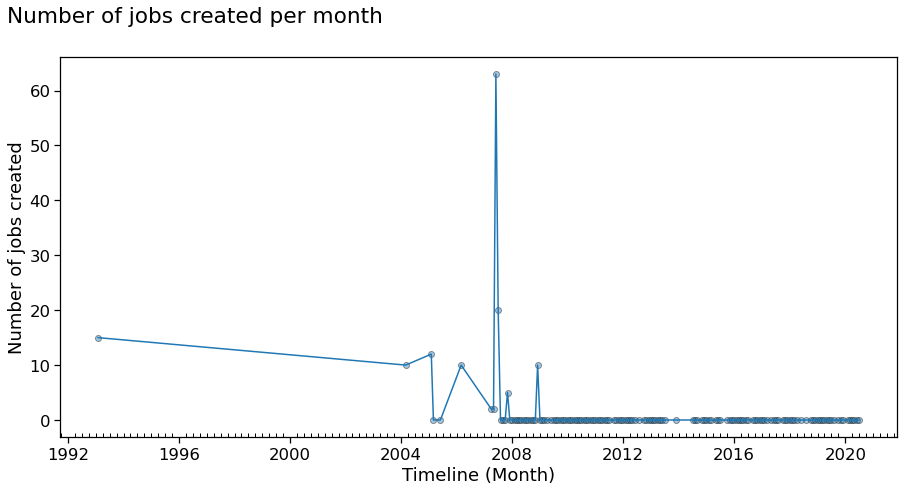

In [12]:
import matplotlib.dates as mdates

sns.set_context('notebook',font_scale=1.5)

fig, ax = plt.subplots(1,1, figsize=(15,7))

ax.plot(g_data.index,g_data)
ax.scatter(g_data.index,g_data, alpha=0.4,  ec='black')
ax.set_xlabel('Timeline (Month)' )
ax.set_ylabel('Number of jobs created')


quarters = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(quarters)
ax.tick_params(axis='x', which='minor', direction="in")

plt.suptitle('Number of jobs created per month',x =0.25)

plt.show()